# $T_4$

There are ${4 \choose 3} = 4$ disallowed configurations, each of which give a pair of equations which we'll encode as matrices $M_1, M_2, M_3, M_4$.

There is an "all equal" vector $u$ which is parallel to all of the planes determined by the above equations. Let's set up some coordinates so that we can easily project the whole thing out.

In [2]:
u = vector([1,1,1,1])


v1 = vector([1,0,0,0])
v2 = vector([0,1,0,0])
v3 = vector([0,0,1,0])

v1 = v1 - (v1*u)*u/u.norm()^2
v2 = v2 - (v2*u)*u/u.norm()^2
v3 = v3 - (v3*u)*u/u.norm()^2

v2 = v2 - (v2*v1)*v1/v1.norm()^2
v3 = v3 - (v3*v1)*v1/v1.norm()^2

v3 = v3 - (v3*v2)*v2/v2.norm()^2

u = u/u.norm()
v1 = v1/v1.norm()
v2 = v2/v2.norm()
v3 = v3/v3.norm()

pretty_print(u)
pretty_print(v1)
pretty_print(v2)
pretty_print(v3)

(1/2, 1/2, 1/2, 1/2)

(1/2*sqrt(3), -1/6*sqrt(3), -1/6*sqrt(3), -1/6*sqrt(3))

(0, sqrt(2/3), -1/2*sqrt(2/3), -1/2*sqrt(2/3))

(0, 0, sqrt(1/2), -sqrt(1/2))

The four matrices, can then be rewritten in terms of the 3-space spanned by $v_1, v_2, v_3$.

In [3]:
M1 = matrix([[1,-1,0,0],[0,1,-1,0]])
M2 = matrix([[1,-1,0,0],[0,1,0,-1]])
M3 = matrix([[1,0,-1,0],[0,0,1,-1]])
M4 = matrix([[0,1,-1,0],[0,0,1,-1]])

pretty_print(M1,M2,M3,M4)

Pl = matrix([v1,v2,v3]).transpose()

pretty_print(Pl)

N1 = M1*Pl
N2 = M2*Pl
N3 = M3*Pl
N4 = M4*Pl

pretty_print(N1,N2,N3,N4)

[ 1 -1  0  0]
[ 0  1 -1  0] [ 1 -1  0  0]
[ 0  1  0 -1] [ 1  0 -1  0]
[ 0  0  1 -1] [ 0  1 -1  0]
[ 0  0  1 -1]

[   1/2*sqrt(3)              0              0]
[  -1/6*sqrt(3)      sqrt(2/3)              0]
[  -1/6*sqrt(3) -1/2*sqrt(2/3)      sqrt(1/2)]
[  -1/6*sqrt(3) -1/2*sqrt(2/3)     -sqrt(1/2)]

[  2/3*sqrt(3)    -sqrt(2/3)             0]
[            0 3/2*sqrt(2/3)    -sqrt(1/2)] [  2/3*sqrt(3)    -sqrt(2/3)             0]
[            0 3/2*sqrt(2/3)     sqrt(1/2)] [  2/3*sqrt(3) 1/2*sqrt(2/3)    -sqrt(1/2)]
[            0             0   2*sqrt(1/2)] [            0 3/2*sqrt(2/3)    -sqrt(1/2)]
[            0             0   2*sqrt(1/2)]

The kernels of the new matrices are 1-dimensional, so we find a basis for them.

In [4]:
w1 = N1.right_kernel().basis_matrix()[0]
w2 = N2.right_kernel().basis_matrix()[0]
w3 = N3.right_kernel().basis_matrix()[0]
w4 = N4.right_kernel().basis_matrix()[0]

w1 = (w1/w1.norm()).simplify_full()
w2 = (w2/w2.norm()).simplify_full()
w3 = (w3/w3.norm()).simplify_full()
w4 = (w4/w4.norm()).simplify_full()

pretty_print(w1)
pretty_print(w2)
pretty_print(w3)
pretty_print(w4)

(1/3, 1/3*sqrt(2), 1/3*sqrt(3)*sqrt(2))

(1/3, 1/3*sqrt(2), -1/3*sqrt(3)*sqrt(2))

(1/3, -2/3*sqrt(2), 0)

(1, 0, 0)

We know that when we remove these lines and quotient by the radial distance, we will get a 8 punctured sphere. Draw it. 

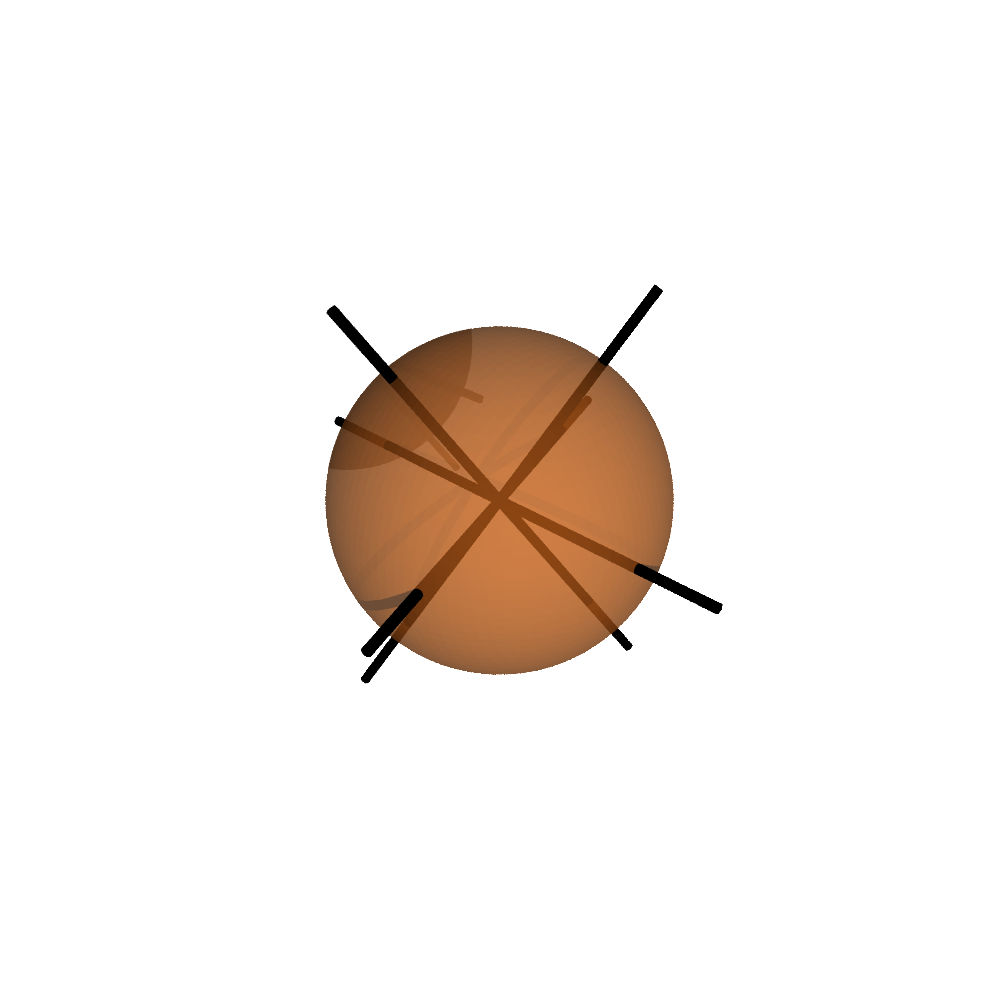

In [5]:
var('t')

P  = parametric_plot3d( t*w1, (t,-1.5,1.5),thickness=4,color='black')
P += parametric_plot3d( t*w2, (t,-1.5,1.5),thickness=4,color='black')
P += parametric_plot3d( t*w3, (t,-1.5,1.5),thickness=4,color='black')
P += parametric_plot3d( t*w4, (t,-1.5,1.5),thickness=4,color='black')

# just for visualization
x,y,z = var('x,y,z')
from sage.plot.colors import chocolate
P += implicit_plot3d( x^2+y^2+z^2 ==1, 
                     (x,-1.1,1.1),
                     (y,-1.1,1.1),
                     (z,-1.1,1.1),
                     color=chocolate.darker(),
                     opacity=0.7)

#P.show(viewer='threejs',aspect_ratio=1)
P.show(viewer='tachyon',aspect_ratio=1,figsize=10,axes=False,frame=False)

Now let's stereographically project the whole thing along the $x$-axis. This identifies $w_4$ with the point at infinity and $-w_4$ with zero.

In [6]:
def stereographic_proj(v):
    """ Stereographic projection """
    return ( v[1]/(1-v[0]), v[2]/(1-v[0]) )

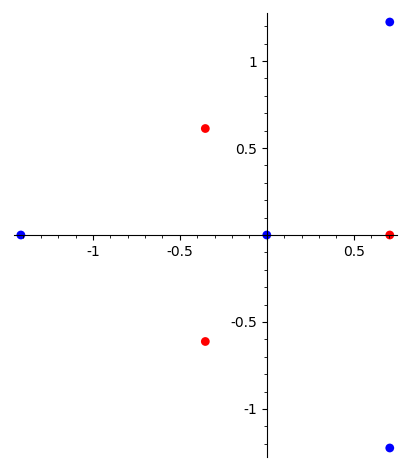

In [7]:
P = Graphics()

P += point(stereographic_proj( w1), size=40, color='blue')
P += point(stereographic_proj(-w1), size=40, color='red')

P += point(stereographic_proj( w2), size=40, color='blue')
P += point(stereographic_proj(-w2), size=40, color='red')

P += point(stereographic_proj( w3), size=40, color='blue')
P += point(stereographic_proj(-w3), size=40, color='red')

#P += point(stereographic_proj( w4), size=40, color='red')
P += point(stereographic_proj(-w4), size=40, color='blue')

P.show(aspect_ratio=1)

In [8]:
def vec_to_complex(v):
    return v[0]+i*v[1]

# The four branch points for the Red/Green pure traid element

In [9]:
pretty_print(vec_to_complex(stereographic_proj(-w1)))

pretty_print(vec_to_complex(stereographic_proj(-w2)))

pretty_print(vec_to_complex(stereographic_proj(-w3)))

#pretty_print(stereographic_proj( w4))
print("infinity")


-1/4*I*sqrt(3)*sqrt(2) - 1/4*sqrt(2)

1/4*I*sqrt(3)*sqrt(2) - 1/4*sqrt(2)

1/2*sqrt(2)

infinity


### we find the equation for the red/green elliptic curve

In [10]:
rg_ec = y^2 == (z-vec_to_complex(stereographic_proj(-w1))) * \
               (z-vec_to_complex(stereographic_proj(-w2))) * \
               (z-vec_to_complex(stereographic_proj(-w3)))

rg_ec = rg_ec.expand().simplify_rational()          
        
pretty_print(rg_ec)

y^2 == 1/4*sqrt(2)*(2*sqrt(2)*z^3 - 1)

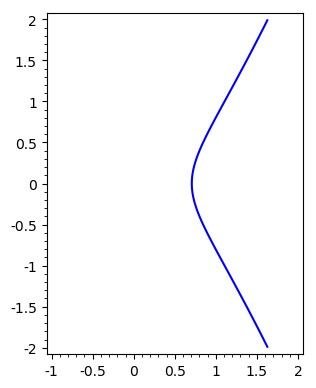

In [11]:
implicit_plot(rg_ec, (z,-1,2), (y,-2,2))

# The four branch points for the Green/Blue pure traid element

In [12]:
pretty_print(vec_to_complex(stereographic_proj( w1)))
pretty_print(vec_to_complex(stereographic_proj( w2)))
pretty_print(vec_to_complex(stereographic_proj( w3)))
pretty_print(vec_to_complex(stereographic_proj(-w4)))

1/2*I*sqrt(3)*sqrt(2) + 1/2*sqrt(2)

-1/2*I*sqrt(3)*sqrt(2) + 1/2*sqrt(2)

-sqrt(2)

0

In [13]:
print(vec_to_complex(stereographic_proj( w1)))
print(vec_to_complex(stereographic_proj( w2)))
print(vec_to_complex(stereographic_proj( w3)))
print(vec_to_complex(stereographic_proj(-w4)))

1/2*I*sqrt(3)*sqrt(2) + 1/2*sqrt(2)
-1/2*I*sqrt(3)*sqrt(2) + 1/2*sqrt(2)
-sqrt(2)
0


### we find the equation for the green/blue elliptic curve
note that this one is quartic! corresponding to the lack of a branch point at infinity.

In [14]:
gb_ec = y^2 == (z-vec_to_complex(stereographic_proj( w1))) * \
               (z-vec_to_complex(stereographic_proj( w2))) * \
               (z-vec_to_complex(stereographic_proj( w3))) * z
        
pretty_print(gb_ec.expand())

y^2 == z^4 + 2*sqrt(2)*z

There is a discussion at
https://math.stackexchange.com/questions/1591990/birational-equivalence-of-diophantine-equations-and-elliptic-curves of how to produce a biholomorphic transformation between the quartic and the equivalent cubic elliptic curves. 


_However_, we are not interested in that right now. Instead, we verify that the RG and GB elliptic curves are related by an inversion of their branch points.

In [15]:
gb_ec = y^2 == (z-1/vec_to_complex(stereographic_proj( w1))) * \
               (z-1/vec_to_complex(stereographic_proj( w2))) * \
               (z-1/vec_to_complex(stereographic_proj( w3)))

maxima_calculus('algebraic: true;')        
        
gb_ec = gb_ec.expand().simplify_rational()    
pretty_print(gb_ec)

y^2 == z^3 + 1/4*sqrt(2)

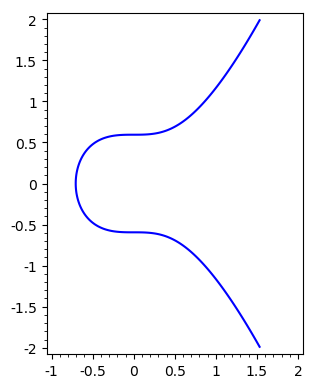

In [16]:
implicit_plot(gb_ec, (z,-1,2), (y,-2,2))

# The four branch points for the Red/Green pure traid element

In [17]:
# red/green branch points
pretty_print(vec_to_complex(stereographic_proj(-w1)))

pretty_print(vec_to_complex(stereographic_proj(-w2)))

pretty_print(vec_to_complex(stereographic_proj(-w3)))

#pretty_print(stereographic_proj( w4))
print("infinity")

# green/blue branch points

pretty_print(vec_to_complex(stereographic_proj( w1)))
pretty_print(vec_to_complex(stereographic_proj( w2)))
pretty_print(vec_to_complex(stereographic_proj( w3)))
pretty_print(vec_to_complex(stereographic_proj(-w4)))


-1/4*I*sqrt(3)*sqrt(2) - 1/4*sqrt(2)

1/4*I*sqrt(3)*sqrt(2) - 1/4*sqrt(2)

1/2*sqrt(2)

infinity


1/2*I*sqrt(3)*sqrt(2) + 1/2*sqrt(2)

-1/2*I*sqrt(3)*sqrt(2) + 1/2*sqrt(2)

-sqrt(2)

0

### we find the equation for the red/green/blue hyper-elliptic curve
note that this one is degree seven! would be degree eight, but there is a branch point at infinity.

In [18]:
rgb_crv = y^2 == (z-vec_to_complex(stereographic_proj(-w1))) * \
                 (z-vec_to_complex(stereographic_proj(-w2))) * \
                 (z-vec_to_complex(stereographic_proj(-w3))) * \
                 (z-vec_to_complex(stereographic_proj( w1))) * \
                 (z-vec_to_complex(stereographic_proj( w2))) * \
                 (z-vec_to_complex(stereographic_proj( w3))) * \
                 (z-vec_to_complex(stereographic_proj(-w4)))

maxima_calculus('algebraic: true;')
        
rgb_crv = rgb_crv.expand().simplify_rational()    
pretty_print(rgb_crv)

y^2 == z^7 + 7/4*sqrt(2)*z^4 - z

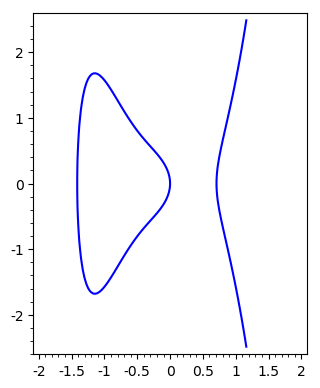

In [19]:
implicit_plot(rgb_crv, (z,-2,2), (y,-2.5,2.5))

In [20]:
rgb_crv.right_hand_side()

z^7 + 7/4*sqrt(2)*z^4 - z

In [21]:
pretty_print( rgb_crv.right_hand_side().factor() )

1/4*(4*z^6 + 7*sqrt(2)*z^3 - 4)*z

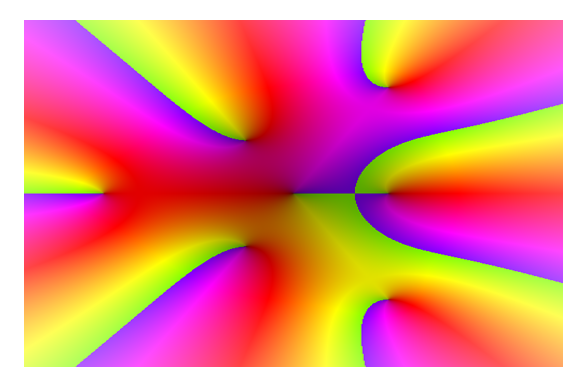

In [22]:
complex_plot( sqrt(rgb_crv.right_hand_side()), (-2,2), (-2,2), 
             plot_points=500, axes=False )

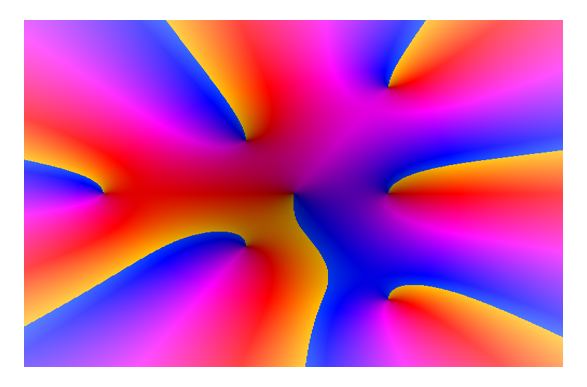

In [23]:
complex_plot( sqrt(rgb_crv.right_hand_side()*exp(2*i*pi/4))/exp(i*pi/4), (-2,2), (-2,2), 
             plot_points=500, axes=False )

In [24]:
# animation

anivec = []

for n in range(200):
    angle = N(2*pi*n/200)
    anivec += [complex_plot( sqrt(rgb_crv.right_hand_side()*exp(2*i*angle))/exp(i*angle), (-2,2), (-2,2),
                            plot_points=500, axes=False )]
    
    
a = animate(anivec)    


KeyboardInterrupt: 

In [ ]:
#a.show()

In [ ]:
#a.ffmpeg(savefile='/home/knappa/animation.mpg')

other stuff

In [25]:
def opp_stereographic_proj(v):
    """ Stereographic projection """
    return ( v[1]/(1+v[0]), v[2]/(1+v[0]) )

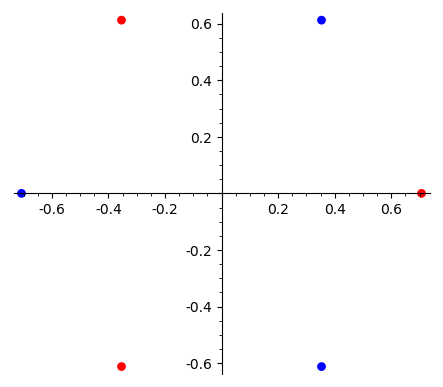

In [26]:
P = Graphics()

P += point(opp_stereographic_proj( w1), size=40, color='blue')
P += point(stereographic_proj(-w1), size=40, color='red')

P += point(opp_stereographic_proj( w2), size=40, color='blue')
P += point(stereographic_proj(-w2), size=40, color='red')

P += point(opp_stereographic_proj( w3), size=40, color='blue')
P += point(stereographic_proj(-w3), size=40, color='red')

#P += point(stereographic_proj( w4), size=40, color='red')
#P += point(opp_stereographic_proj(-w4), size=40, color='blue')

P.show(aspect_ratio=1)

In [27]:
gb_ec = y^2 == (z-vec_to_complex(opp_stereographic_proj( w1))) * \
               (z-vec_to_complex(opp_stereographic_proj( w2))) * \
               (z-vec_to_complex(opp_stereographic_proj( w3)))

gb_ec = gb_ec.expand().simplify_rational()    
pretty_print(gb_ec)

y^2 == z^3 + 1/4*sqrt(2)

In [28]:
pretty_print(factor(z^3-sqrt(2)/4))

z^3 - 1/4*sqrt(2)

In [29]:
pretty_print(factor(z^3+sqrt(2)/4))

z^3 + 1/4*sqrt(2)

### Green/Blue traid

In [101]:
gb1 = vec_to_complex(stereographic_proj( w1))
gb2 = vec_to_complex(stereographic_proj( w2))
gb3 = vec_to_complex(stereographic_proj( w3))
gb4 = vec_to_complex(stereographic_proj(-w4))

pretty_print([gb1,gb2,gb3,gb4])

[1/2*I*sqrt(3)*sqrt(2) + 1/2*sqrt(2),
 -1/2*I*sqrt(3)*sqrt(2) + 1/2*sqrt(2),
 -sqrt(2),
 0]

In [147]:
def complex_to_vector(c):
    return vector([c.real(),c.imag()])

def make_vector_field(func,x,y):
    return complex_to_vector(func(z=x+sqrt(-1)*y))

def moebius_pair(alpha,beta):
    moebius = ((z-alpha)/(z-beta))/(alpha-beta)
    return sqrt(-1)*moebius/moebius.norm()


In [ ]:
#connection_part = (moebius_pair(-1,1)+moebius_pair(1,-1))/2
connection_part = moebius_pair(-1,1)

pretty_print( connection_part )

assume(x,'real')
assume(y,'real')
vf_connection_part = make_vector_field(connection_part,x,y).simplify_full()
#pretty_print(vf_connection_part)


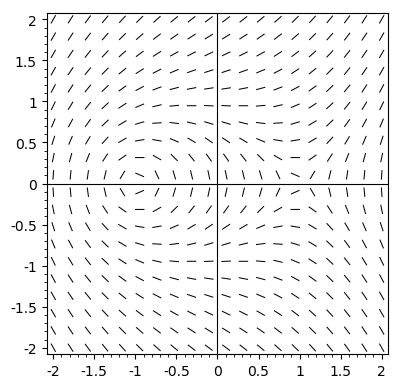

In [149]:
plot_slope_field(vf_connection_part[1]/vf_connection_part[0],
                 (x,-2,2), (y,-2,2), aspect_ratio=1)

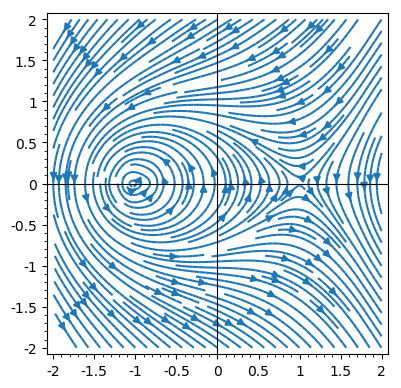

In [150]:
streamline_plot((vf_connection_part[0], vf_connection_part[1]), 
                (x,-2,2), (y,-2,2), density=2, aspect_ratio=1)

In [151]:
connection = 0
from itertools import combinations
for alpha, beta in combinations([gb1,gb2,gb3,gb4], 2):
    connection += moebius_pair(alpha,beta)
    #connection -= moebius_pair(beta,alpha)

In [152]:
Q = Graphics()

Q += point(stereographic_proj( w1), size=40, color='black', zorder=10)
Q += point(stereographic_proj( w2), size=40, color='black', zorder=10)
Q += point(stereographic_proj( w3), size=40, color='black', zorder=10)
Q += point(stereographic_proj(-w4), size=40, color='black', zorder=10)

Q += point(stereographic_proj(-w1), size=40, color='red', zorder=10)
Q += point(stereographic_proj(-w2), size=40, color='red', zorder=10)
Q += point(stereographic_proj(-w3), size=40, color='red', zorder=10)
#Q += point(stereographic_proj( w4), size=40, color='black', zorder=10)

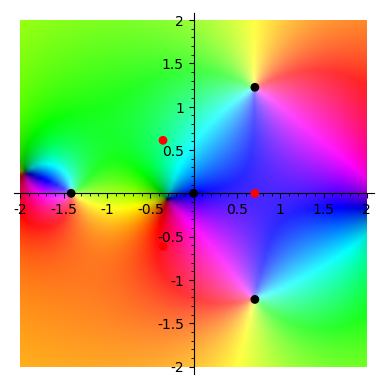

In [153]:
P = Q + complex_plot(connection, (-2,2), (-2,2))

P.show(aspect_ratio=1)

In [154]:
pretty_print(connection(z=vec_to_complex(stereographic_proj(-w1))).simplify_full())
pretty_print(connection(z=vec_to_complex(stereographic_proj(-w2))).simplify_full())
pretty_print(connection(z=vec_to_complex(stereographic_proj(-w3))).simplify_full())
#pretty_print(connection(z=vec_to_complex(stereographic_proj( w4))).simplify_full())

5/3*sqrt(3)*sqrt(2) - 1/3*I*sqrt(2)

-5/3*sqrt(3)*sqrt(2) + 5/3*I*sqrt(2)

-sqrt(3)*sqrt(2) - 13/3*I*sqrt(2)

In [ ]:
assume(x,'real')
assume(y,'real')
vf_connection = make_vector_field(connection,x,y).simplify_full()

In [ ]:
#plot_vector_field(vf_connection, (x,-2,2), (y,-2,2), aspect_ratio=1)
P = Q + plot_slope_field(vf_connection[1]/vf_connection[0], (x,-2,2), (y,-2,2))

P.show(aspect_ratio=1)

In [ ]:
streamline_plot((vf_connection[0], vf_connection[1]), (x,-2,2), (y,-2,2), density=2)